In [20]:
import pandas as pd
import numpy as np

tnc = pd.read_csv('Titanic.csv')

In [22]:
tnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          887 non-null    float64
 5   SibSp        891 non-null    int64  
 6   ParCh        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [24]:
#manipulating data
del tnc['PassengerId'] #delete UID
tnc = tnc.astype({'Pclass' : 'category'}) #change to category
tnc.dtypes #print data types

Survived      object
Pclass      category
Sex           object
Age          float64
SibSp          int64
ParCh          int64
Fare         float64
Embarked      object
dtype: object

In [28]:
#facilitate data
#create another variable based on family size
# - 0 = single, >0<=4 medium, >5 large
tnc['FamilySize'] = tnc['SibSp'] + tnc['ParCh'] #calculate family size
bins = [np.NINF, 0, 4, np.inf] #create bins

names = ['Single', 'Medium', 'Large'] #name cateogries

tnc['FamType'] = pd.cut(tnc['FamilySize'], bins, labels = names) #create new column
print(tnc.FamType)
print(tnc.FamType.value_counts())

0      Medium
1      Medium
2      Single
3      Medium
4      Single
        ...  
886    Single
887    Single
888    Medium
889    Single
890    Single
Name: FamType, Length: 891, dtype: category
Categories (3, object): ['Single' < 'Medium' < 'Large']
FamType
Single    537
Medium    307
Large      47
Name: count, dtype: int64


In [30]:
del bins, names

In [32]:
print(tnc.FamType)
print(tnc.FamType.value_counts())

0      Medium
1      Medium
2      Single
3      Medium
4      Single
        ...  
886    Single
887    Single
888    Medium
889    Single
890    Single
Name: FamType, Length: 891, dtype: category
Categories (3, object): ['Single' < 'Medium' < 'Large']
FamType
Single    537
Medium    307
Large      47
Name: count, dtype: int64


In [34]:
tnc['SurvTF'] = (tnc.Survived == 'Yes')

In [36]:
tnc.dtypes

Survived        object
Pclass        category
Sex             object
Age            float64
SibSp            int64
ParCh            int64
Fare           float64
Embarked        object
FamilySize       int64
FamType       category
SurvTF            bool
dtype: object

In [40]:
tnc.to_csv('Titanic2.csv')

In [44]:
tnc.info

<bound method DataFrame.info of     Survived Pclass     Sex   Age  SibSp  ParCh     Fare Embarked  FamilySize  \
0         No      3    male  22.0      1      0   7.2500        S           1   
1        Yes      1  female  38.0      1      0  71.2833        C           1   
2        Yes      3  female  26.0      0      0   7.9250        S           0   
3        Yes      1  female  35.0      1      0  53.1000        S           1   
4         No      3    male  35.0      0      0   8.0500        S           0   
..       ...    ...     ...   ...    ...    ...      ...      ...         ...   
886       No      2    male  27.0      0      0  13.0000        S           0   
887      Yes      1  female  19.0      0      0  30.0000        S           0   
888       No      3  female   7.0      1      2  23.4500        S           3   
889      Yes      1    male  26.0      0      0  30.0000        C           0   
890       No      3    male  32.0      0      0   7.7500        Q           0

In [46]:
tnc.Survived.value_counts()

Survived
No     549
Yes    342
Name: count, dtype: int64

In [60]:
tnc.groupby('Pclass').SurvTF.mean()

/var/folders/rq/b0x_q_0j2ldcwn543bj__9zw0000gn/T/ipykernel_79661/3536178361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tnc.groupby('Pclass').SurvTF.mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: SurvTF, dtype: float64

/var/folders/rq/b0x_q_0j2ldcwn543bj__9zw0000gn/T/ipykernel_79661/1716739299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tnc.groupby('Pclass').SurvTF.mean().plot(kind = 'bar')


NameError: name 'plt' is not defined

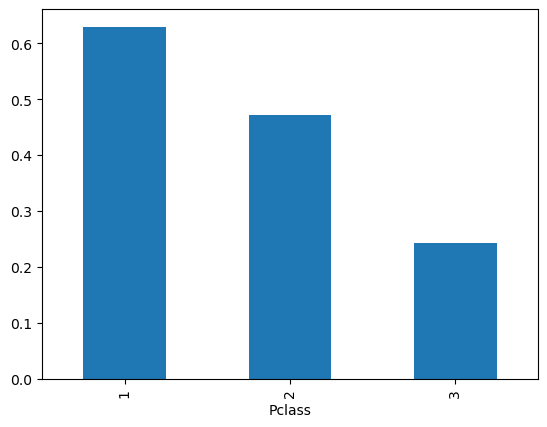

In [66]:
tnc.groupby('Pclass').SurvTF.mean().plot(kind = 'bar')
plt.show()

NameError: name 'plt' is not defined

In [70]:
tnc.groupby(tnc.Fare > 20).SurvTF.mean()

Fare
False    0.277670
True     0.529255
Name: SurvTF, dtype: float64

In [72]:
tnc.groupby((tnc.Age >= 25) & (tnc.Age <= 50)).SurvTF.mean()

Age
False    0.371824
True     0.395197
Name: SurvTF, dtype: float64

In [74]:
tnc.groupby(['Pclass', 'Sex']).SurvTF.mean()

/var/folders/rq/b0x_q_0j2ldcwn543bj__9zw0000gn/T/ipykernel_79661/1982329685.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tnc.groupby(['Pclass', 'Sex']).SurvTF.mean()


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: SurvTF, dtype: float64

In [76]:
tnc.groupby('Survived').Fare.mean()

Survived
No     22.117887
Yes    48.395408
Name: Fare, dtype: float64

In [78]:
tnc.groupby('Survived').Fare.median()

Survived
No     10.5
Yes    26.0
Name: Fare, dtype: float64

In [80]:
tnc.groupby('Survived').Fare.std()

Survived
No     31.388207
Yes    66.596998
Name: Fare, dtype: float64

In [82]:
tnc.groupby('Age').Fare.mean()

Age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: Fare, Length: 89, dtype: float64

In [86]:
tnc.groupby('Survived')[['Fare', 'Age']].agg(['mean', 'median', 'std']).round(2)

Fare                  Age              
           mean median    std   mean median    std
Survived                                          
No        22.12   10.5  31.39  30.14   28.0  13.90
Yes       48.40   26.0  66.60  28.41   28.0  14.43

In [88]:
tnc.groupby('Pclass').size()

/var/folders/rq/b0x_q_0j2ldcwn543bj__9zw0000gn/T/ipykernel_79661/4115327969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tnc.groupby('Pclass').size()


Pclass
1    216
2    184
3    491
dtype: int64

In [92]:
tnc.groupby('Pclass').count()

/var/folders/rq/b0x_q_0j2ldcwn543bj__9zw0000gn/T/ipykernel_79661/359208594.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tnc.groupby('Pclass').count()


,Survived,Sex,Age,SibSp,ParCh,Fare,Embarked,FamilySize,FamType,SurvTF
Pclass,,,,,,,,,,
1,216,216,216,216,216,216,214,216,216,216
2,184,184,184,184,184,184,184,184,184,184
3,491,491,487,491,491,491,491,491,491,491


In [94]:
tnc.groupby(['Pclass', 'Survived']).size().unstack()

/var/folders/rq/b0x_q_0j2ldcwn543bj__9zw0000gn/T/ipykernel_79661/1189563072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tnc.groupby(['Pclass', 'Survived']).size().unstack()


Survived,No,Yes
Pclass,,
1,80,136
2,97,87
3,372,119
